# 2. Data wrangling

## 2.1 Imports

In [1]:
# Import numpy, pandas, matplotlib.pyplot, and seaborn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


## 2.2 Load the bank account fraud data

Raw data `Base.csv` was downloaded from [Kaggle](https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022) and saved in `../raw_data/Base.csv`.

In [2]:
baf_data = pd.read_csv('../raw_data/Base.csv')

In [3]:
# Call the info method on baf_data to see a summary of the data.
baf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

`fraud_bool` is the target "fraud or not" label. The other 31 columns are potential features. Currently 3 data types `int64`, `float64`, and `object`.

In [4]:
# Call the head method on baf_data to print the first several rows of the data as sample.
baf_data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


## 2.3 Explore the data

### 2.3.1 Missing Values Replacement based on columns description in `datasheet.pdf`

According to [datasheet.pdf](https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf), `prev_address_months_count`, `current_address_months_count`, `bank_months_count` columns have missing values as '-1'. First let's replace them with `np.NaN` to make them clearer.

In [5]:
# Replace 'prev_address_months_count', 'current_address_months_count', 'bank_months_count' missing values with np.NaN
replace_list = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count']
for item in replace_list:
    baf_data[item] = baf_data[item].replace(-1, np.NaN)


### 2.3.2 Number of missing values by column

In [6]:
# Count the number of missing values and the percentages in each column of baf_data.
# Order them by decreasing using sort_values
# Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([baf_data.isnull().sum(), 100 * baf_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
prev_address_months_count,712920,71.2920
bank_months_count,253635,25.3635
current_address_months_count,4254,0.4254
fraud_bool,0,0.0000
foreign_request,0,0.0000
phone_home_valid,0,0.0000
phone_mobile_valid,0,0.0000
has_other_cards,0,0.0000
proposed_credit_limit,0,0.0000
session_length_in_minutes,0,0.0000


As `prev_address_months_count`and `bank_months_count` have quite some missing value. Let's also check missing values count grouped by `fraud_bool` to see if there could be any great differences.

In [7]:
# Count the number of missing values groupby fraud_bool, and the percentages in groups of each column.
missing2 = pd.concat([baf_data.isnull().groupby(baf_data['fraud_bool']).sum(), 100 * baf_data.isnull().groupby(baf_data['fraud_bool']).mean()], axis=0).T
# missing2
# Change missing2 column names to 'fraud_0_count','fraud_1_count', 'fraud_0_%', 'fraud_1_%, and sort values by 'fraud_1_%'.
missing2.columns=['fraud_0_count', 'fraud_1_count', 'fraud_0_%', 'fraud_1_%']
missing2.sort_values(by='fraud_1_%', ascending=False)

,fraud_0_count,fraud_1_count,fraud_0_%,fraud_1_%
prev_address_months_count,702786.0,10134.0,71.062347,91.885030
bank_months_count,249495.0,4140.0,25.227737,37.537401
current_address_months_count,4240.0,14.0,0.428728,0.126938
fraud_bool,0.0,0.0,0.000000,0.000000
foreign_request,0.0,0.0,0.000000,0.000000
phone_home_valid,0.0,0.0,0.000000,0.000000
phone_mobile_valid,0.0,0.0,0.000000,0.000000
has_other_cards,0.0,0.0,0.000000,0.000000
proposed_credit_limit,0.0,0.0,0.000000,0.000000
session_length_in_minutes,0.0,0.0,0.000000,0.000000


We cannot tell great differences on missing values count between fraud_0_% and fraud_1_% yet. `prev_address_months_count` has above 71% of missing values in both fraud and non-fraud instances, but we are not going to drop the column yet at the moment. Only 3 columns [`prev_address_months_count`, `bank_months_count`, `current_address_months_count`] have missing values so far but we will look further.

### 2.3.3 Check duplicated instances

Although `datasheet.pdf` said each instance was generated independently from each other and there were no redundancies in the dataset, we can double check if any possbile duplicates exist.

In [8]:
# Although the columns are annomymized, a combination of
# 'customer_age', 'days_since_request', 'intended_balcon_amount', 'session_length_in_minutes', 'payment_type', 'source'
# is used to check the uniqueness of instances.
check_list = ['customer_age', 'days_since_request', 'intended_balcon_amount', 'session_length_in_minutes', 'payment_type', 'source']
# baf_data[sel_list].value_counts(dropna=False).head()
duplicates = baf_data.duplicated(subset=check_list, keep=False)
baf_data[duplicates]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


No duplicates of instances were found.

### 2.3.4 Categorical features

Now let's inspect categorical features. According to the descriptions in `datasheet.pdf`, both `categorical` and `binary` columns should be categorical features. First, let's see the described categorical columns in `object` `Dtype`.

In [9]:
# Select columns of dtype 'object'
baf_object = baf_data.select_dtypes('object')
baf_object.head()

,payment_type,employment_status,housing_status,source,device_os
0,AA,CA,BA,INTERNET,windows
1,AB,CA,BA,INTERNET,windows
2,AC,CB,BA,INTERNET,other
3,AB,CA,BA,INTERNET,linux
4,AB,CA,BA,INTERNET,macintosh


In [10]:
# Check the unique value counts.
baf_object.nunique()

payment_type         5
employment_status    7
housing_status       7
source               2
device_os            5
dtype: int64

In [11]:
# save the 'object' dtype column names to a list.
object_list = list(baf_object.columns)
print(object_list)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [12]:
# Print the unique values and counts of object columns.
for col_name in object_list:
    print(baf_object[col_name].value_counts())


AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: payment_type, dtype: int64
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: employment_status, dtype: int64
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: housing_status, dtype: int64
INTERNET    992952
TELEAPP       7048
Name: source, dtype: int64
other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: device_os, dtype: int64


All 5 object columns have limited valid values and counts, and no missing values. We will convert their dtypes to `category`.

In [13]:
# Convert object columns in baf_data to 'category' dtype.
for col_name in object_list:
    baf_data[col_name] = baf_data[col_name].astype('category')
# Verify the convertion
baf_data[object_list].dtypes

payment_type         category
employment_status    category
housing_status       category
source               category
device_os            category
dtype: object

The described `binary` columns are also categorical features. There are 7 of them: `fraud_bool`, `email_is_free`, `phone_home_valid`, `phone_mobile_valid`, `has_other_cards`, `foreign_request`, and `keep_alive_session`.

In [14]:
# Subset columns of `binary` features and save to 'baf_binary'
binary_list = ['fraud_bool', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session']
baf_binary = baf_data[binary_list]
baf_binary.head()

,fraud_bool,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session
0,1,0,1,0,0,0,0
1,1,1,0,0,0,0,0
2,1,1,0,1,0,0,0
3,1,1,0,1,1,0,0
4,1,1,1,0,0,0,1


In [15]:
# Check the unique value counts.
baf_binary.nunique()

fraud_bool            2
email_is_free         2
phone_home_valid      2
phone_mobile_valid    2
has_other_cards       2
foreign_request       2
keep_alive_session    2
dtype: int64

In [16]:
# Print the unique values and counts of object columns.
for col_name in list(baf_binary.columns):
    print(baf_binary[col_name].value_counts())

0    988971
1     11029
Name: fraud_bool, dtype: int64
1    529886
0    470114
Name: email_is_free, dtype: int64
0    582923
1    417077
Name: phone_home_valid, dtype: int64
1    889676
0    110324
Name: phone_mobile_valid, dtype: int64
0    777012
1    222988
Name: has_other_cards, dtype: int64
0    974758
1     25242
Name: foreign_request, dtype: int64
1    576947
0    423053
Name: keep_alive_session, dtype: int64


All 7 `binary` columns have valid 0 or 1 values and counts, and no missing values. We will also convet their dtypes to 'category' to make data structure clearer.

In [17]:
# Convert decribed binary columns in baf_data to 'category' dtype.
for col_name in binary_list:
    baf_data[col_name] = baf_data[col_name].astype('category')
# Verify the convertion
baf_data[binary_list].dtypes

fraud_bool            category
email_is_free         category
phone_home_valid      category
phone_mobile_valid    category
has_other_cards       category
foreign_request       category
keep_alive_session    category
dtype: object

Subset of all categorical columns/features, including targeting `fraud_bool`.

In [18]:
# Categorical column names are the combination of 'binary_list' and 'object_list'
categorical_list = binary_list + object_list
# Subset categorical columns and save to baf_caterorical
baf_categorical = baf_data[categorical_list]
print(baf_categorical.shape)
baf_categorical.head()

(1000000, 12)


,fraud_bool,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,payment_type,employment_status,housing_status,source,device_os
0,1,0,1,0,0,0,0,AA,CA,BA,INTERNET,windows
1,1,1,0,0,0,0,0,AB,CA,BA,INTERNET,windows
2,1,1,0,1,0,0,0,AC,CB,BA,INTERNET,other
3,1,1,0,1,1,0,0,AB,CA,BA,INTERNET,linux
4,1,1,1,0,0,0,1,AB,CA,BA,INTERNET,macintosh


In total, including our targeting `fraud_bool` column, there are 12 categorical columns, with no missing values.

### 2.3.5 Categorical features distribution

In [19]:
# Print all categorical column names. Let's visulize their data distribution next.
print(categorical_list)


['fraud_bool', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


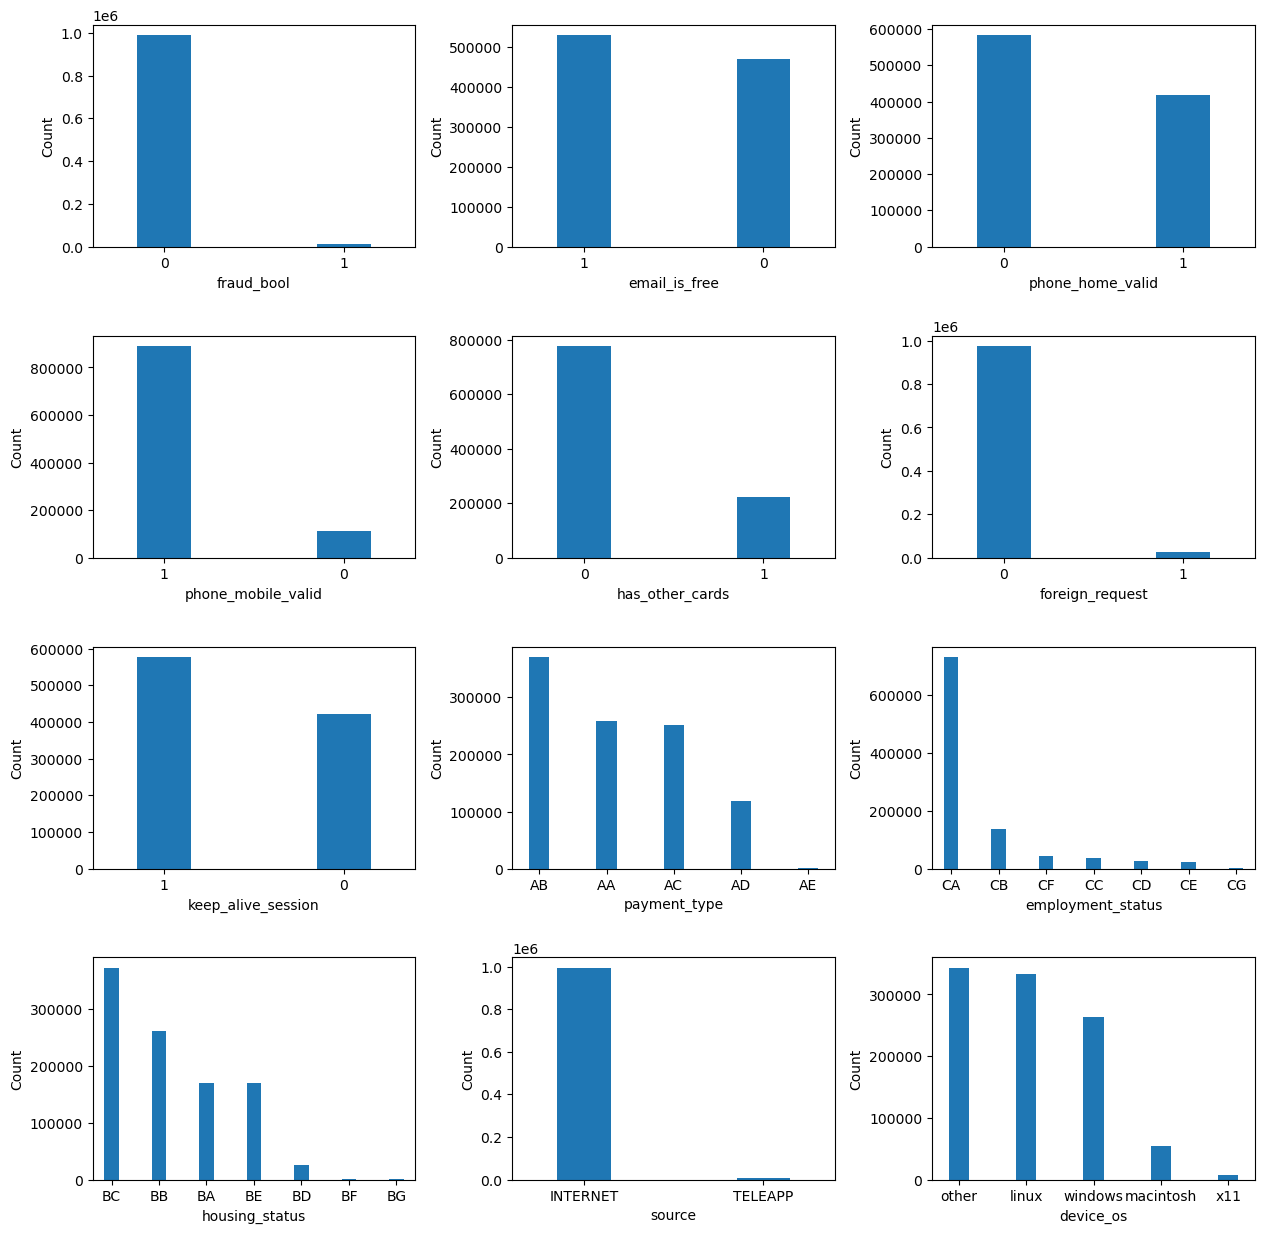

In [20]:
# Define a function to create bar plots of each categorical columns.
def barplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.4)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]    # numpy.flatten(): Return a copy of the axes array collapsed into one dimension.
        baf_categorical[col].value_counts().plot(kind='bar', ax=ax, width=0.3, rot=0)
        ax.set(xlabel=col, ylabel='Count')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

# Draw plots
barplots(categorical_list, ncol=3, figsize=(15, 15))

We can see that our target `fraud_bool` values are quite biased, and some other features such as 'foreign request', 'source', etc. That's reasonable. All the categorical columns data distribution seemed right for now.

### 2.3.6 Numeric features

Next, we are going to inspect the numeric features. We can get numeric column names using list comprehension method, then subset the numeric dataframe to start.

In [21]:
# Subset numeric columns (excluding categorical columns) and save to baf_numeric
baf_numeric = baf_data.loc[:, ~baf_data.columns.isin(categorical_list)]
# Save Numeric column names to numeric_list
numeric_list = list(baf_numeric.columns)
# Show the first few rows of baf_numeric
baf_numeric.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
0,0.9,0.166828,NaN,88.0,50,0.020925,-1.331345,769,10650.765523,3134.319630,3863.647740,1,6,185,24.0,500.0,3.888115,1,0,7
1,0.9,0.296286,NaN,144.0,50,0.005418,-0.816224,366,534.047319,2670.918292,3124.298166,718,3,259,15.0,1500.0,31.798819,1,0,7
2,0.9,0.044985,NaN,132.0,40,3.108549,-0.755728,870,4048.534263,2893.621498,3159.590679,1,14,177,NaN,200.0,4.728705,1,0,7
3,0.9,0.159511,NaN,22.0,50,0.019079,-1.205124,810,3457.064063,4054.908412,3022.261812,1921,6,110,31.0,200.0,2.047904,1,0,7
4,0.9,0.596414,NaN,218.0,50,0.004441,-0.773276,890,5020.341679,2728.237159,3087.670952,1990,2,295,31.0,1500.0,3.775225,1,0,7


In [22]:
# First, let's list the simple statistic descriptions of numeric columns.
baf_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,287080.0,60.719967,63.578187,5.000000e+00,25.000000,34.000000,72.000000,383.000000
current_address_months_count,995746.0,86.962058,88.409289,0.000000e+00,20.000000,53.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404
velocity_24h,1000000.0,4769.781965,1479.212612,1.300307e+03,3593.179135,4749.921161,5752.574191,9506.896596


We already know there are missing values in [`prev_address_months_count`, `bank_months_count`, `current_address_months_count`], with value counts less than 1000000. In the `min` value section, there are some `negative` values, such as `intended_balcon_amount`, `velocity_6h`, `credit_risk_score`, `session_length_in_minutes`, and `device_distinct_emails_8w`. Those negative values need to be double checked to see if those could be errors, or if `-1` also meant to be missing values.

In [23]:
# According to datasheet.pdf, `intended_balcon_amount` means initial transferred amount for application.
# Get instances with minus `intended_balcon_amount` values in baf_data
baf_data[baf_data['intended_balcon_amount'] < 0]


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,NaN,88.0,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,NaN,144.0,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,NaN,132.0,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,NaN,22.0,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,NaN,218.0,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,0,0.1,0.904650,11.0,1.0,10,0.018529,-1.153810,AD,3864,...,0,200.0,0,INTERNET,19.006557,linux,0,1,0,4
999993,0,0.2,0.322666,29.0,11.0,20,71.370152,-1.624459,AC,1412,...,0,500.0,0,INTERNET,4.237440,windows,1,1,0,4
999994,0,0.1,0.516887,NaN,31.0,20,0.027890,-1.031909,AD,3000,...,0,200.0,0,INTERNET,1.706083,other,1,1,0,4
999995,0,0.6,0.192631,NaN,104.0,40,0.030592,-1.044454,AB,804,...,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4


In [24]:
# Let's also check instance numbers of `fraud_bool`==0 and negative `intended_balcon_amount` values.
baf_data[(baf_data['intended_balcon_amount'] < 0) & (baf_data['fraud_bool'] == 0)]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
1428,0,0.9,0.647941,NaN,70.0,40,0.012117,-0.766488,AC,522,...,0,200.0,0,INTERNET,1.007767,windows,1,1,0,7
1429,0,0.6,0.609731,142.0,38.0,20,0.009758,-0.936167,AD,1634,...,0,200.0,0,INTERNET,9.211731,windows,1,1,0,7
1430,0,0.7,0.559477,NaN,31.0,40,0.018022,-1.292500,AB,584,...,0,200.0,0,INTERNET,6.292767,other,1,1,0,7
1431,0,0.2,0.697797,NaN,43.0,20,0.010220,-1.216727,AB,536,...,0,500.0,0,INTERNET,4.174046,windows,1,1,0,7
1432,0,0.9,0.851661,NaN,67.0,40,0.018711,-1.157349,AB,1285,...,0,200.0,0,INTERNET,2.663006,linux,1,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,0,0.1,0.904650,11.0,1.0,10,0.018529,-1.153810,AD,3864,...,0,200.0,0,INTERNET,19.006557,linux,0,1,0,4
999993,0,0.2,0.322666,29.0,11.0,20,71.370152,-1.624459,AC,1412,...,0,500.0,0,INTERNET,4.237440,windows,1,1,0,4
999994,0,0.1,0.516887,NaN,31.0,20,0.027890,-1.031909,AD,3000,...,0,200.0,0,INTERNET,1.706083,other,1,1,0,4
999995,0,0.6,0.192631,NaN,104.0,40,0.030592,-1.044454,AB,804,...,0,200.0,0,INTERNET,8.511502,linux,1,1,0,4


While there are 732776 (73.28% of all) `fraud_bool`==0 (not fraud) instances with negative `intended_balcon_amount` values, which is the majority of the total 742523 instances (74.25% of all) with negative value. Also those negative values seem to be continuous (not limited number of discreet values such as '-1'). Although negative initial transferred amount seem odd, they are probably valid here, as the majority instances are labeled as not fraud. We don't know if that's because the `intended_balcon_amount` values had been re-scaled, may contact the data source authors to ask. The distribution will also be visulized in charts later on.

In [25]:
# `velocity_6h`: Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours.
# Get negative `velocity_6h` values instances in baf_numeric and print the shape
print(baf_numeric[baf_numeric['velocity_6h'] < 0].shape)
baf_numeric[baf_numeric['velocity_6h'] < 0]

# Get negative `velocity_6h` values instances in baf_data
# baf_data[baf_data['velocity_6h'] < 0]

(44, 20)


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
16377,0.4,0.856215,NaN,364.0,50,0.013556,-1.241433,1866,-125.400006,3998.182435,3137.004786,6,1,299,11.0,1500.0,4.558192,1,0,7
62454,0.4,0.718008,NaN,138.0,50,0.043085,-1.162961,1223,-13.506605,3577.257662,3075.654308,6,5,203,2.0,1500.0,6.883209,1,0,7
67129,0.6,0.595753,NaN,103.0,30,0.012392,-1.006361,867,-35.802547,2567.956219,3064.357504,2,8,122,1.0,200.0,1.362453,1,0,7
68620,0.8,0.355740,NaN,256.0,40,0.004925,-1.204235,599,-56.791556,2353.903185,3066.626142,984,4,283,1.0,1500.0,1.212084,1,0,7
74007,0.2,0.926170,NaN,58.0,40,0.012589,-0.373714,1297,-56.672529,2321.425145,4401.585325,10,6,147,1.0,500.0,7.249548,1,0,7
74466,0.1,0.168459,NaN,34.0,30,0.014483,-1.318787,1346,-85.633881,2066.159660,4376.052967,1,6,115,NaN,200.0,4.089585,1,0,7
85994,0.6,0.532094,NaN,109.0,40,0.048684,-0.614180,563,-53.509700,1858.522564,3103.487420,10,6,239,15.0,990.0,3.495708,1,0,7
87162,0.4,0.690944,NaN,18.0,20,0.018456,-1.569098,427,-32.026567,3768.340921,3195.388132,10,6,205,1.0,500.0,1.597919,1,0,7
88817,0.8,0.789946,NaN,98.0,40,0.002858,-0.881101,1547,-1.889614,3567.030818,3159.916769,5,6,79,25.0,200.0,0.861925,1,0,7
94583,0.9,0.589988,NaN,131.0,40,0.008650,-0.701251,867,-32.063093,2933.391635,3144.780528,13,4,185,11.0,500.0,0.993141,1,0,7


There are 44 negative values (small percentage out of all) of `velocity_6h` and these are all fraud_bool==0 instances (not fraud, as also checked in baf_data). These 44 transaction instances are valid. The negative `velocity_6h` values varied continuously. As the speed couldn't be negative, I may also contact data source author to check if it's a data re-scaled issue, or if those were because of some other error and need to be replaced as missing value `np.NaN`.

In [26]:
# `credit_risk_score`: internal score of application risk.
# Get negative `credit_risk_score` values instances in baf_numeric and sort by ascending.
baf_numeric[baf_numeric['credit_risk_score'] < 0].sort_values(by='credit_risk_score')

# baf_numeric[baf_numeric['credit_risk_score'] < 0].sort_values(by='credit_risk_score').head(50)

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
137389,0.2,0.456039,NaN,37.0,10,6.903319,13.753219,1150,11095.673526,6021.231275,4989.423099,4,7,-170,31.0,200.0,62.869575,1,0,3
458098,0.1,0.566611,NaN,32.0,20,0.016485,-1.176922,791,4322.773818,6699.563182,5018.143329,14,12,-169,1.0,200.0,9.274581,1,0,1
382645,0.8,0.720002,NaN,302.0,20,0.006762,17.819054,1595,2113.711877,5980.768694,5347.792403,2219,6,-168,3.0,200.0,2.249748,2,0,2
744110,0.5,0.993546,NaN,87.0,20,19.872595,40.904823,2312,7126.601755,6168.397295,6681.042934,3,22,-167,28.0,500.0,7.653172,1,0,0
451852,0.4,0.122105,NaN,185.0,20,3.347227,-1.215927,2493,12100.108172,8846.061260,5439.926176,1,13,-166,NaN,200.0,9.432610,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663110,0.7,0.728104,NaN,19.0,30,0.022163,-0.938972,970,1142.960817,5942.521126,5969.453104,70,18,-1,26.0,200.0,2.645304,1,0,0
310900,0.4,0.084287,NaN,39.0,30,0.022949,-1.088283,1242,8024.302262,4829.543205,5131.314217,11,12,-1,30.0,200.0,3.846677,1,0,2
283136,0.6,0.500639,NaN,137.0,30,6.413040,26.299947,602,5607.197872,5168.862961,5713.033019,2,6,-1,11.0,200.0,2.106046,1,0,2
457779,0.1,0.559146,24.0,5.0,20,12.395370,-0.516323,2271,6328.072840,4607.599820,5675.031403,1,31,-1,NaN,200.0,20.068378,1,0,1


Negative values of `credit_risk_score` ranges from -170 to -1, also a continuous distribution, 14445 instances (1.44% of all). We will check all numeric features distribution in chart plots later together. Same as the `velocity_6h`, it might be related to the scaling window, or some internal risk score margins. If the value distribution is not like obvious outlier, they are probably valid. Although may also be checked with data source author.

In [27]:
# `session_length_in_minutes`: length of user session in banking website in minutes.
# Get negative `session_length_in_minutes` values instances in baf_numeric and sort by ascending.
baf_numeric[baf_numeric['session_length_in_minutes'] < 0].sort_values(by='session_length_in_minutes')

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
1321,0.5,0.043523,115.0,182.0,30,1.772944,-0.488127,1216,2333.900915,2576.160622,3096.929826,1,9,71,NaN,500.0,-1.0,0,0,7
675712,0.1,0.302575,NaN,85.0,30,1.535097,-0.846673,880,9110.294079,5919.533167,6718.730122,1,7,191,NaN,1500.0,-1.0,0,0,0
674178,0.1,0.459218,NaN,85.0,60,1.515882,-1.357565,1236,6959.789978,5342.217535,6684.615275,0,2,48,NaN,200.0,-1.0,0,0,0
673870,0.1,0.483862,NaN,51.0,40,0.007883,-1.427483,2533,9814.661417,5601.704959,6708.097751,196,7,117,28.0,200.0,-1.0,0,0,0
673796,0.1,0.564384,NaN,177.0,50,0.003325,-1.694667,1342,4769.150466,4458.223798,6332.165894,40,7,119,19.0,200.0,-1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387301,0.1,0.490745,NaN,121.0,40,1.465154,-0.217510,1260,8430.752585,4814.876895,4904.623612,2,2,-12,NaN,200.0,-1.0,1,0,1
386881,0.2,0.555910,NaN,193.0,40,11.502498,-0.199650,2604,6825.626555,4955.115981,5578.014532,0,6,35,NaN,200.0,-1.0,-1,0,1
385912,0.9,0.161713,NaN,272.0,40,3.090821,-0.550045,1446,8481.412049,5335.071885,4728.189305,0,10,60,NaN,200.0,-1.0,0,0,1
390547,0.6,0.456145,NaN,186.0,50,9.599785,-0.325867,1204,5100.000201,6492.250034,5578.012929,1,2,44,NaN,200.0,-1.0,0,0,1


There are 2015 instances (0.2% of all) with negative `session_length_in_minutes` value and the difference is they are all "-1", not a continuous varation. While negative values for time makes no sense, and all same "-1" could probably be a mark as missing or unknown value, although it's not pointed out in datasheet.pdf. I'd replace the "-1" values with np.NaN, although may also contact the data source to confirm.

In [28]:
# `device_distinct_emails_8w`: number of distinct emails in banking website from the used device in last 8 weeks.
# Get minus `device_distinct_emails_8w` values instances in baf_numeric and sort by ascending.
baf_numeric[baf_numeric['device_distinct_emails_8w'] < 0].sort_values(by='device_distinct_emails_8w')

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,device_fraud_count,month
11661,0.5,0.218817,NaN,37.0,40,0.009379,-1.249844,2702,5720.499944,4214.658362,4832.532791,0,5,136,26.0,200.0,0.829324,-1,0,7
630410,0.2,0.457219,NaN,152.0,20,0.000755,-0.923236,1148,8823.552637,6849.932170,5948.194602,607,4,159,28.0,1500.0,4.800327,-1,0,0
625711,0.9,0.772754,NaN,39.0,40,0.037975,13.272743,310,8426.223308,6779.617037,6819.542604,1458,5,68,21.0,200.0,4.646904,-1,0,0
621836,0.9,0.424966,NaN,23.0,50,0.015377,-0.706985,1257,9889.246345,6812.995872,6674.180458,10,2,69,28.0,200.0,2.644059,-1,0,0
620870,0.8,0.520890,NaN,46.0,60,0.001907,-0.825121,4044,8390.441870,7453.046261,6374.915410,1,2,107,30.0,200.0,2.942641,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398376,0.4,0.813299,NaN,256.0,20,1.834524,52.079434,1547,13606.768089,6342.784091,5653.950271,20,13,59,21.0,200.0,2.766095,-1,0,1
397798,0.2,0.533867,NaN,55.0,70,0.013984,-1.408978,1076,4670.027371,6967.807874,5561.124843,1,3,120,NaN,200.0,-1.000000,-1,0,1
396115,0.8,0.823095,NaN,42.0,30,2.713542,-1.364438,860,9489.924799,8003.846255,4837.967486,0,7,39,NaN,200.0,-1.000000,-1,0,1
425119,0.1,0.864036,NaN,127.0,30,0.018258,10.426874,1120,4508.699724,4057.537022,5659.717588,386,15,32,10.0,200.0,-1.000000,-1,0,1


Same as `session_length_in_minutes`, email numbers couldn't be negative, and all the 359 instances with negative `device_distinct_emails_8w` have the same value of "-1". That probably means missing or unknow value. I'd replace the "-1" values with np.NaN together with the `session_length_in_minutes` case.

After checking the 5 numeric features with minus values, I am going to replace the discreet `-1` value of `session_length_in_minutes` and `device_distinct_emails_8w` to `np.NaN`. `credit_risk_score` probably has no problem and we will see the feature distributions in charts. Negative `intended_balcon_amount`, `velocity_6h` makes no sense but the data variation was continuous, could be a data re-scaling issure, I will need to be double check with data source author for confirmation.

In [29]:
# Replace 'session_length_in_minutes' and 'device_distinct_emails_8w' -1 values with np.NaN in baf_data
baf_data['session_length_in_minutes'] = baf_data['session_length_in_minutes'].replace(-1, np.NaN)
baf_data['device_distinct_emails_8w'] = baf_data['device_distinct_emails_8w'].replace(-1, np.NaN)


In [30]:
# Verify the replacement by value sorting
baf_data.sort_values(by='session_length_in_minutes').tail()
# baf_data.sort_values(by='device_distinct_emails_8w').tail()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
995741,0,0.6,0.188995,NaN,35.0,20,10.609424,-0.868126,AC,1365,...,1,200.0,0,TELEAPP,NaN,other,0,1.0,0,4
996571,0,0.9,0.140092,NaN,90.0,50,8.380761,18.215101,AA,1735,...,1,200.0,0,TELEAPP,NaN,macintosh,0,0.0,0,4
998154,0,0.2,0.031420,NaN,297.0,40,0.032300,-1.683688,AC,1160,...,0,200.0,0,TELEAPP,NaN,other,0,0.0,0,4
998573,0,0.6,0.434297,31.0,13.0,30,0.000602,-0.976377,AB,1326,...,0,500.0,0,TELEAPP,NaN,other,0,0.0,0,4
999188,0,0.1,0.174547,NaN,194.0,70,3.641522,-1.405628,AB,1430,...,0,200.0,0,TELEAPP,NaN,other,0,0.0,0,4


### 2.3.7 Numeric features distribution

In [31]:
# Print all numeric column names and total number.
print(numeric_list)
print(len(numeric_list))

['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w', 'device_fraud_count', 'month']
20


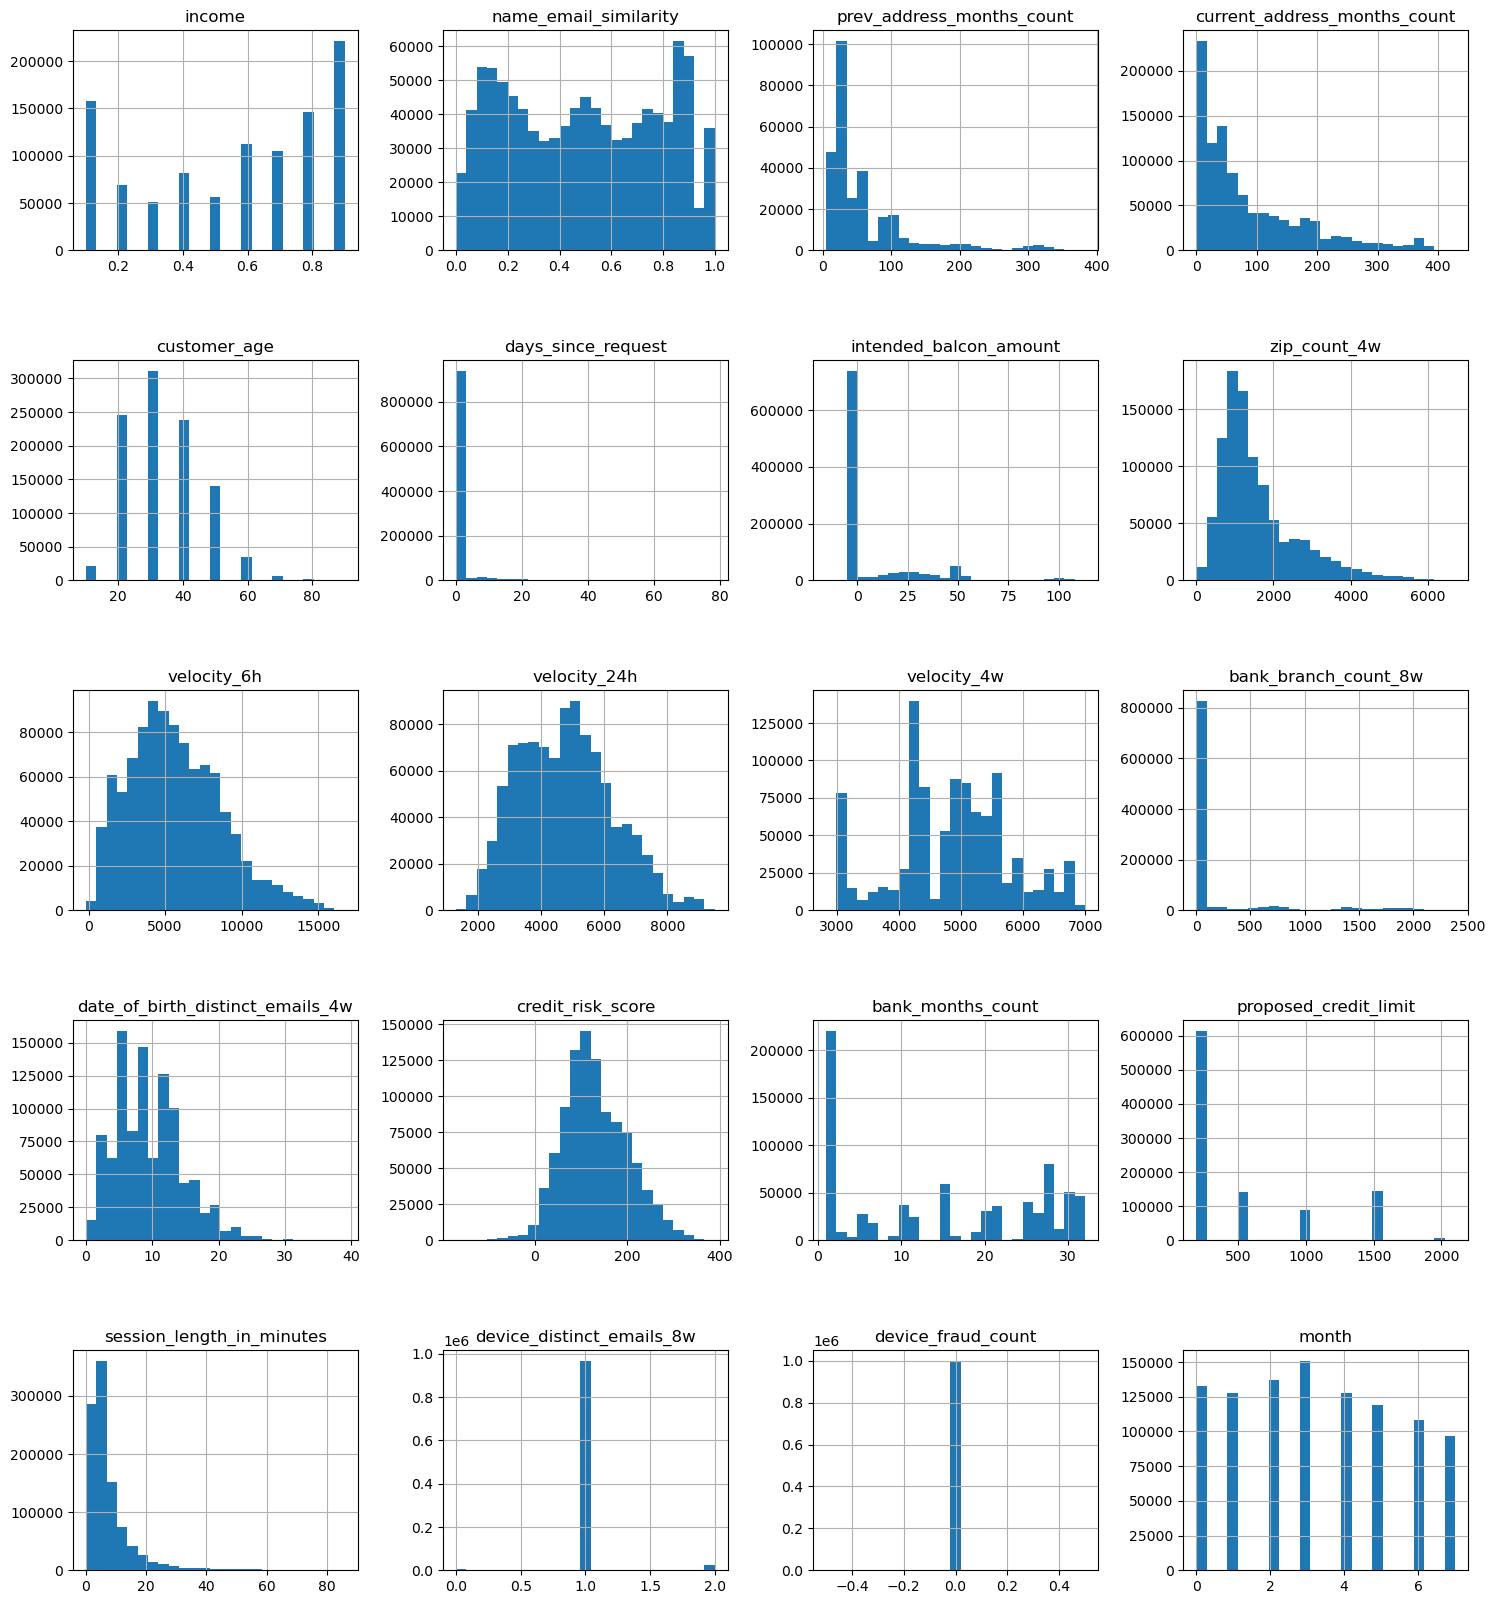

In [32]:
# Plot histograms of all the numeric features to visulize their data distribution.
baf_data[numeric_list].hist(figsize=(18, 20), bins=25)
plt.subplots_adjust(hspace=0.5);

From the histogram charts, we can see that some of the features are close to normal distribution, although a little left or right skewed, such as 'customer_age', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'credit_risk_score', etc. The Negative part of 'credit_risk_score' is probably fine. 'intended_balcon_amount' distribution is quite skewed to left "< 0" part, and that's the majority, kind out of my expectation. 'days_since_request' also quite skewed to near 0, guess it's because the instances were collected into dataset soon after the transactions. 'velocity_4w' has two high frequencies on the left side of the near normal distribution, which might be interesting for later check on. 'bank_branch_count_8w' shows some instances above 1000 applications in the last 8 weeks, which might also be the interesting ones.

### 2.3.8 Save processed dataframe to file

In [33]:
# Check baf_data.info() again before saving to file.
baf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  float64 
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         287080 non-null   float64 
 4   current_address_months_count      995746 non-null   float64 
 5   customer_age                      1000000 non-null  int64   
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  category
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

In [34]:
# Prepare the processed dataframe in categorical + numeric columns order
processed_list = categorical_list + numeric_list
baf_processed = baf_data[processed_list]

# Save the intermediate result to '../data/baf_processed.csv'
if not os.path.exists('../data/'):
    os.mkdir('../data/')
baf_processed.to_csv('../data/baf_processed.csv.gz', compression='gzip')
